# Tarea 7
## NLP

**Descripción**: para un texto en español, tokenización, lematización con Stanza y determinar la frecuencia de los tokens y de los lemas.

**Alumno**: Miguel Angel Soto Hernandez

In [ ]:
!pip install stanza

In [ ]:
#librerias necesarias
%matplotlib inline
import stanza
import numpy as np
import matplotlib.pyplot as plt 

# Libreria en espanol de Stanza
stanza.download('es')

In [27]:
# abrimos nuestro texto y lo guardamos en la variable corpus
corpus = open('./Marques de Sade -Justine.txt').read()

print(corpus)
print(len(corpus))

Justine, o los infortunios de la virtud

de

Donatien Alphonse François, Marqués de Sade


Prólogo

A mi buena amiga

Sí, Constance, a ti dirijo esta obra; a la vez el ejemplo y el honor de tu sexo, sumando al alma más sensible la mente más justa y la mejor iluminada, sólo a ti corresponde conocer la dulzura de las lágrimas que arranca la Virtud infortunada. Detestando los sofismas del libertinaje y de la irreligión, combatiéndolos incesantemente con tus actos y tus discursos, no temo en absoluto para ti los que ha necesitado en estas memorias el tipo de personajes trazados; el cinismo de algunas plumas (suavizadas sin embargo lo más posible) no te horrorizará más; es el Vicio el que, gimiendo por ser desvelado, se escandaliza así que se le ataca. El proceso de Tartufo fue incoado por unos santurrones; el de Justine será obra de los libertinos. Me inspiran escaso temor: mis razones, desveladas por ti, no serán condenadas; tu opinión basta para mi gloria, y debo, después de haberte gust

In [28]:
# definiendo el idioma y las funciones que se aplicarán
stanza_nlp = stanza.Pipeline('es', processors='tokenize, lemma, pos')

# convirtiendo el texto a un formato reconocido por stanza
texto_stanza = stanza_nlp(corpus)

2021-03-28 06:32:02 WARNING: Language es package default expects mwt, which has been added
2021-03-28 06:32:02 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |

2021-03-28 06:32:02 INFO: Use device: cpu
2021-03-28 06:32:02 INFO: Loading: tokenize
2021-03-28 06:32:02 INFO: Loading: mwt
2021-03-28 06:32:02 INFO: Loading: pos
2021-03-28 06:32:03 INFO: Loading: lemma
2021-03-28 06:32:03 INFO: Done loading processors!


In [64]:
# por medio de ciclos for anidados obtenemos los tokens y los lemas
# de nuestro texto
tokens = np.array([palabra.text for oracion in texto_stanza.sentences
                                for palabra in oracion.words])
lemas = np.array([palabra.lemma for oracion in texto_stanza.sentences
                                for palabra in oracion.words])
print(len(tokens))
print(len(lemas))

128453
128453


In [65]:
# importamos re para manejar expresiones regulares
import re

#  \w+ acepta cualquier caracter que se encuentre en el rango de [a-zA-Z0-9_]
# aplicamos una expresión regular que haga
tokens = np.array([token for token in tokens if re.search('\w+', token)])
lemas = np.array([lema for lema in lemas if re.search('\w+', lema)])

In [66]:
# transformar palabras a minúsculas para que hagan match con las palabras auxiliares
tokens = np.array([token.lower() for token in tokens])
lemas = np.array([lemas.lower() for lemas in lemas])

In [67]:
# importamos spacy para obtener las palabras auxiliares del espanol
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
stopwords = spacy.lang.es.stop_words.STOP_WORDS

# quitamos las palabras auxiliares mediante un bucle que las busque en el texto
tokens = np.array([token for token in tokens if not token in stopwords])
lemas = np.array([lema for lema in lemas if not lema in stopwords])

In [68]:
# total de tokens y lemas
print(f'Tokens: {len(tokens)}')
print(f'Lemas: {len(lemas)}')

Tokens: 47829
Lemas: 46063


In [69]:
# importamos nltk.probability para obtener la frecuencia 
# de nuestras palabras
from nltk.probability import FreqDist 

frecuencia_tokens = FreqDist(tokens)
frecuencia_lemas = FreqDist(lemas)

In [75]:
# Frecuencia tokens
frecuencia_tokens.most_common(100)

[('a', 2833),
 ('y', 2483),
 ('o', 301),
 ('thérèse', 209),
 ('hombre', 198),
 ('señor', 161),
 ('mujer', 149),
 ('jamás', 146),
 ('señora', 146),
 ('años', 132),
 ('naturaleza', 130),
 ('instante', 128),
 ('joven', 126),
 ('virtud', 122),
 ('casa', 116),
 ('vida', 115),
 ('crimen', 108),
 ('oh', 106),
 ('dios', 101),
 ('ojos', 91),
 ('conde', 87),
 ('inmediatamente', 87),
 ('mundo', 85),
 ('mujeres', 85),
 ('placeres', 84),
 ('—dijo', 83),
 ('hombres', 79),
 ('manos', 78),
 ('noche', 75),
 ('rodin', 75),
 ('duda', 74),
 ('corazón', 74),
 ('muerte', 68),
 ('mil', 67),
 ('cruel', 66),
 ('—me', 66),
 ('lágrimas', 65),
 ('fuerza', 64),
 ('boca', 64),
 ('placer', 64),
 ('hubiera', 63),
 ('leyes', 63),
 ('punto', 63),
 ('dubois', 62),
 ('criatura', 61),
 ('podía', 61),
 ('querida', 60),
 ('suerte', 60),
 ('desdichada', 59),
 ('crímenes', 59),
 ('habría', 58),
 ('cielo', 56),
 ('padre', 56),
 ('roland', 56),
 ('mano', 55),
 ('hija', 53),
 ('imposible', 53),
 ('palabra', 52),
 ('camino', 52),

In [76]:
# Frecuencia lemas
frecuencia_lemas.most_common(100)

[('a', 2833),
 ('y', 2483),
 ('o', 301),
 ('querer', 280),
 ('hombre', 277),
 ('mujer', 235),
 ('deber', 229),
 ('thérèse', 209),
 ('señor', 170),
 ('crimen', 167),
 ('joven', 157),
 ('servir', 157),
 ('dejar', 152),
 ('placer', 149),
 ('año', 147),
 ('virtud', 146),
 ('jamás', 146),
 ('señora', 146),
 ('instante', 145),
 ('encontrar', 143),
 ('acabar', 142),
 ('llegar', 134),
 ('mano', 133),
 ('naturaleza', 130),
 ('creer', 128),
 ('sentir', 124),
 ('parecer', 121),
 ('casa', 120),
 ('seguir', 119),
 ('vida', 115),
 ('ofrecer', 112),
 ('oh', 106),
 ('dios', 106),
 ('cuyo', 104),
 ('fuerza', 96),
 ('ojo', 92),
 ('espantoso', 89),
 ('pasar', 89),
 ('palabra', 88),
 ('cruel', 88),
 ('conde', 88),
 ('inmediatamente', 87),
 ('mundo', 85),
 ('recibir', 85),
 ('desdichado', 84),
 ('noche', 81),
 ('tratar', 79),
 ('corazón', 78),
 ('duda', 77),
 ('cosa', 76),
 ('abandonar', 75),
 ('colocar', 75),
 ('rodin', 75),
 ('volver', 74),
 ('ley', 74),
 ('descubrir', 74),
 ('pie', 72),
 ('entregar', 72

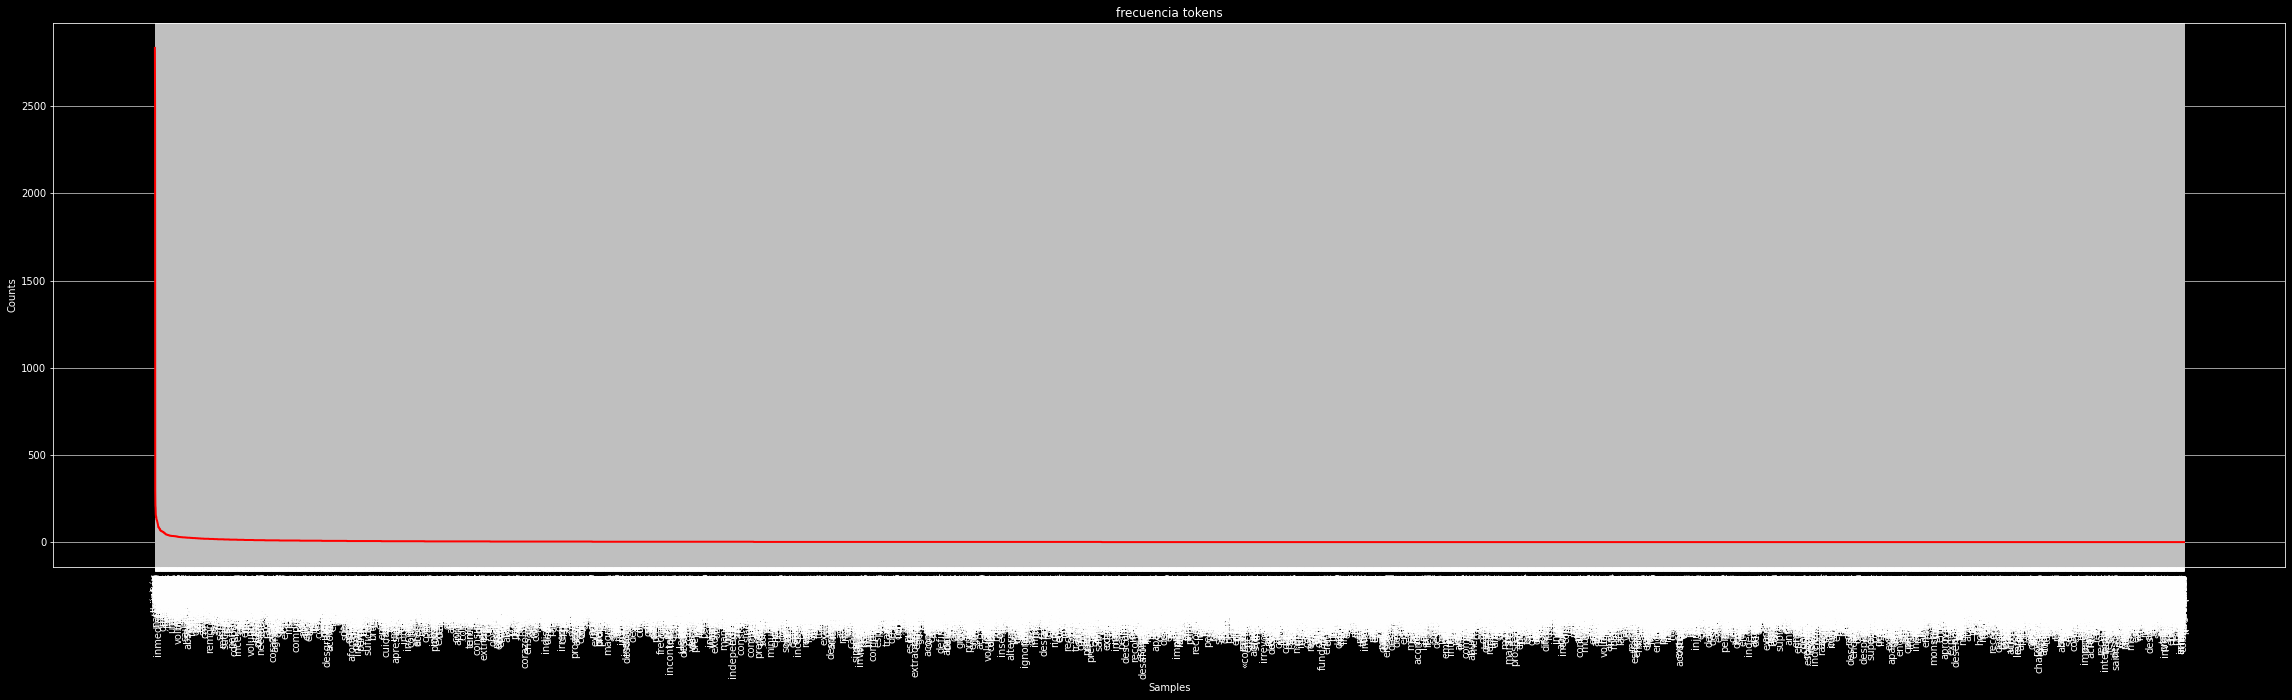

In [70]:
# graficando tokens
plt.style.use('dark_background') # usar fondo negro para nuestro plot
plt.figure(figsize=(40, 10)) # definir el tamaño de nuestra figura que se mostrará
plt.title('frecuencia tokens') # título y tamaño de la letra de nuestro plot
frecuencia_tokens.plot(color='red') # plot de nuestra función

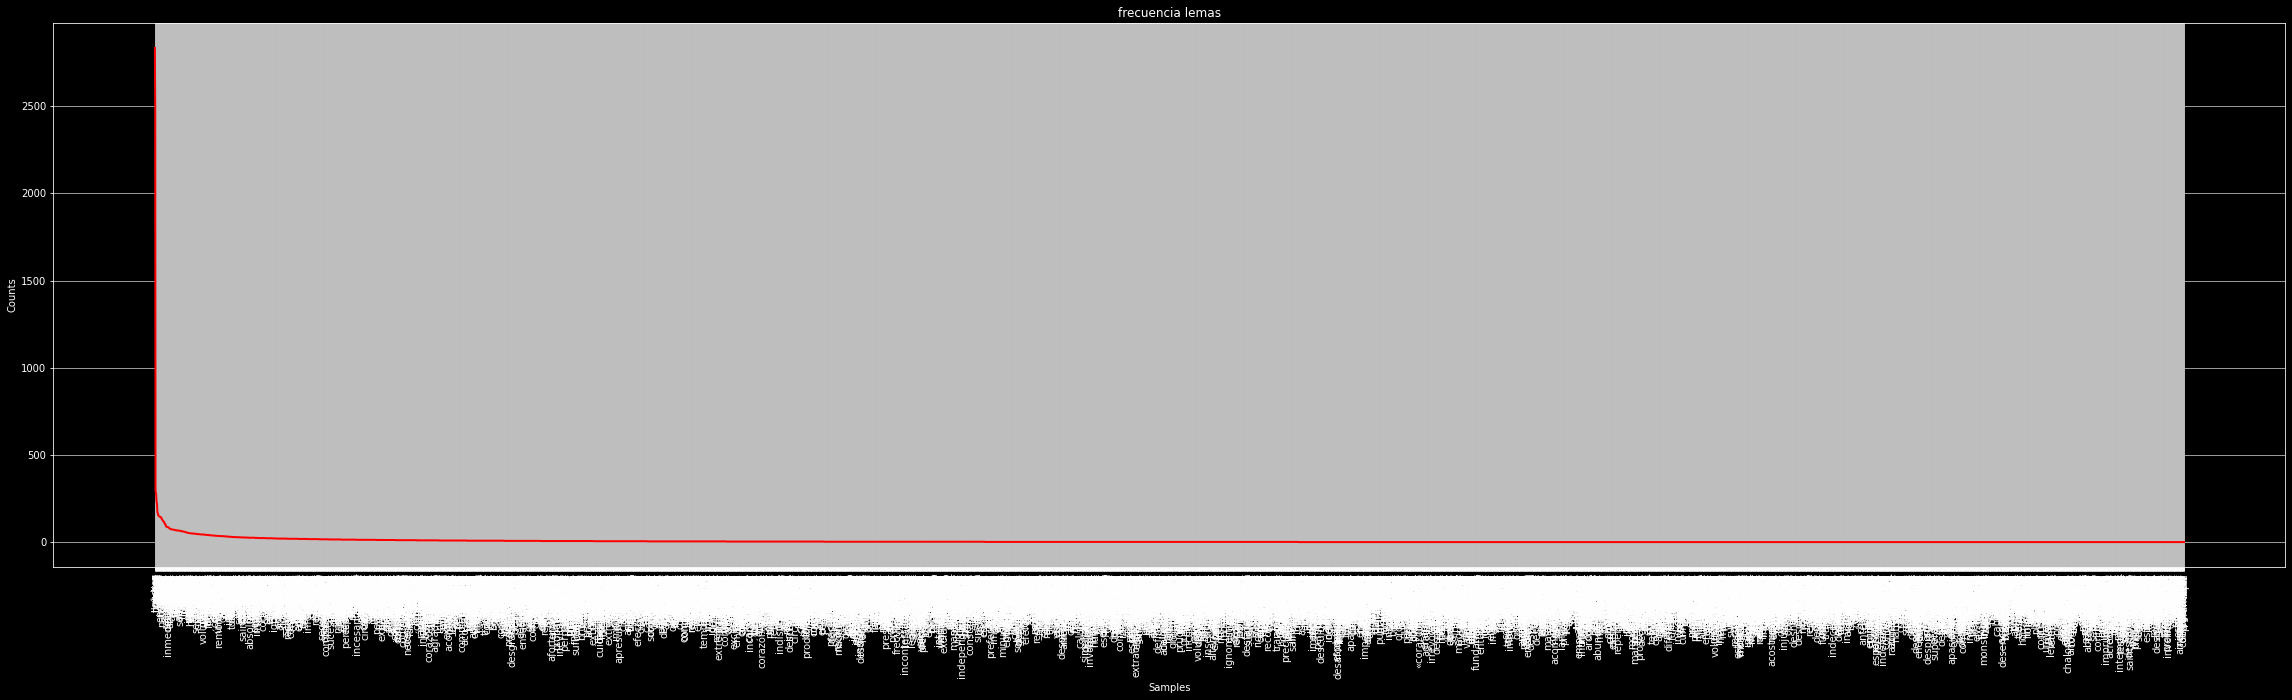

In [71]:
# graficando tokens
plt.style.use('dark_background') # usar fondo negro para nuestro plot
plt.figure(figsize=(40, 10)) # definir el tamaño de nuestra figura que se mostrará
plt.title('frecuencia lemas') # título y tamaño de la letra de nuestro plot
frecuencia_lemas.plot(color='red') # plot de nuestra función